In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['font.size'] = 20
plt.rcParams['legend.fontsize'] = 20

The Newton fractal
The Newton–Raphson method for finding the roots of a function                                               
 takes an initial guess to a root, x0,                                                                
 and seeks successively better approximations of it as:
$$\large{x_{n+1}=x_n−\frac{f(x_n)}{f′(x_n)}}.$$
That is, at each iteration, the root is approximated as $x_{n+1}$,                                     
the x-axis intercept of the tangent to the graph at $f(x_n)$. 

When applied to functions of a complex variable $z$, 
the method can be used to create interesting fractals 
                                                                                                           by considering which root it converges to for a set of numbers in the complex plane. 
                                                                                                           The code below generates a fractal image by coloring those points in the complex plane used as the initial guess by the root found.

The Newton-Raphson method applied to f(z).

    Returns the root found, starting with an initial guess, z0, or False
    if no convergence to tolerance TOL was reached within MAX_IT iterations.
    
    Plot a Newton Fractal by finding the roots of f(z).

    The domain used for the fractal image is the region of the complex plane
    (xmin, xmax, ymin, ymax) where z = x + iy, discretized into n values along each axis.

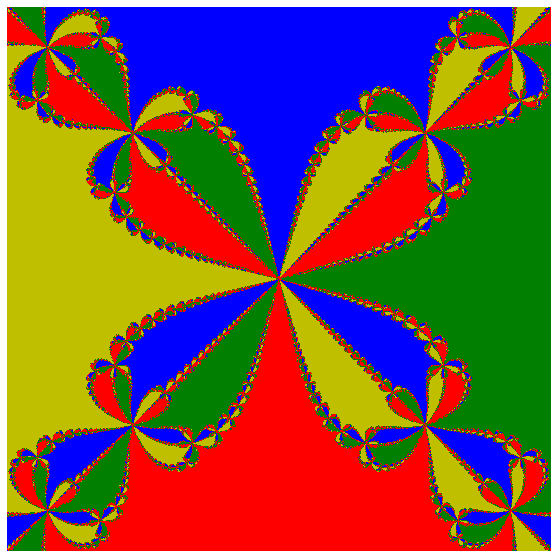

In [2]:
# A list of colors to distinguish the roots.
colors = ['b', 'r', 'g', 'y']

TOL = 1.e-8

def newton(z0, f, fprime, MAX_IT=1000):
    z = z0
    for i in range(MAX_IT):
        dz = f(z)/fprime(z)
        if abs(dz) < TOL:
            return z
        z -= dz
    return False

def plot_newton_fractal(f, fprime,fn, n=200, domain=(-1, 1, -1, 1)):
    roots = []
    m = np.zeros((n, n))

    def get_root_index(roots, r):
        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1

    xmin, xmax, ymin, ymax = domain
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            r = newton(z0, f, fprime)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
    nroots = len(roots)
    if nroots > len(colors):
        # Use a "continuous" colormap if there are too many roots.
        cmap = 'hsv'
    else:
        # Use a list of colors for the colormap: one for each root.
        cmap = ListedColormap(colors[:nroots])
    fig,ax=plt.subplots()    
    plt.imshow(m, cmap=cmap, origin='lower')
    plt.axis('off')
    plt.savefig(fn, dpi=600)
    plt.show()

f = lambda z: z**4 - 1
fprime = lambda z: 4*z**3

plot_newton_fractal(f, fprime, n=1000,fn='f1.jpg')

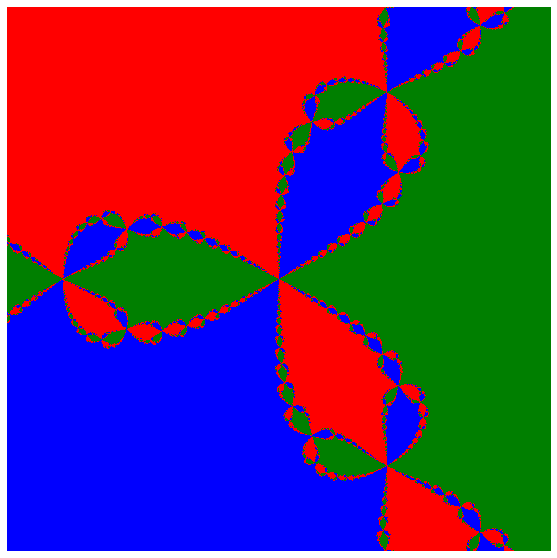

In [3]:
f = lambda z: z**3 - 1
fprime = lambda z: 3*z**2

plot_newton_fractal(f, fprime, n=1000,fn='f2.jpg')

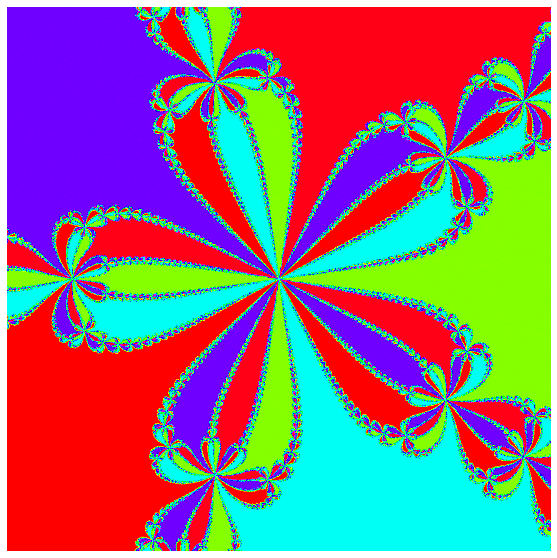

In [4]:
f = lambda z: z**5 - 1
fprime = lambda z: 5*z**4

plot_newton_fractal(f, fprime, n=1000,fn='f3.jpg')

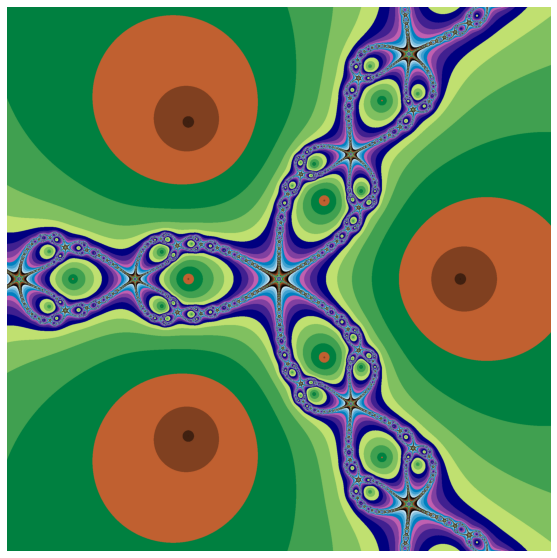

In [5]:
def c_newton(f,fn,max_iter = 200):
    width = height = 2140
    image = Image.new('RGB', (width, height))
    xmin, xmax = -1.5, 1.5
    ymin, ymax = -1.5, 1.5
    h = 1e-6  # Step size
    eps = 1e-3  # Maximum error

    # Draw the fractal.
    for y in range(height):
        zy = y * (ymax - ymin) / (height - 1) + ymin
        for x in range(width):
            zx = x * (xmax - xmin) / (width - 1) + xmin
            z = complex(zx, zy)
            for i in range(max_iter):
                # Complex numerical derivative.
                dz = (f(z + complex(h, h)) - f(z)) / complex(h, h)
                z0 = z - f(z) / dz    # Newton iteration.
                if abs(z0 - z) < eps: # Stop when close enough to any root.
                    break
                z = z0
            image.putpixel((x, y), (i % 4 * 64, i % 8 * 32, i % 16 * 16))

    plt.imshow(image)
    plt.axis('off')
    plt.savefig(fn, dpi=600)
    return None

def f(z):
    return z**3 - 1.0  # Complex function.

c_newton(f,'fl1.jpg',1000)

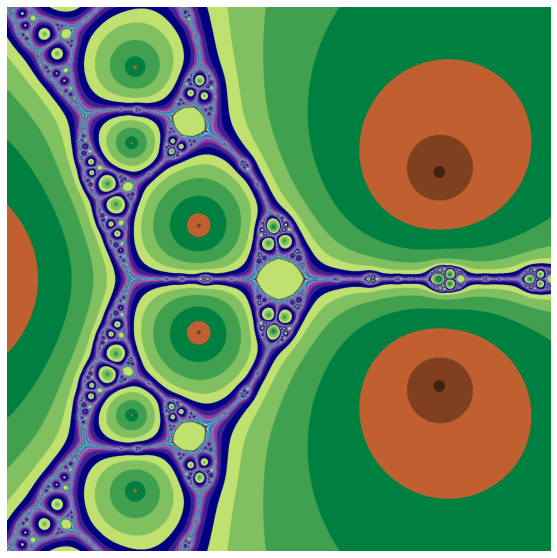

In [6]:
f=lambda z: z**3-2*z + 2.0  # Complex function.

c_newton(f,'fl2.jpg',1000)

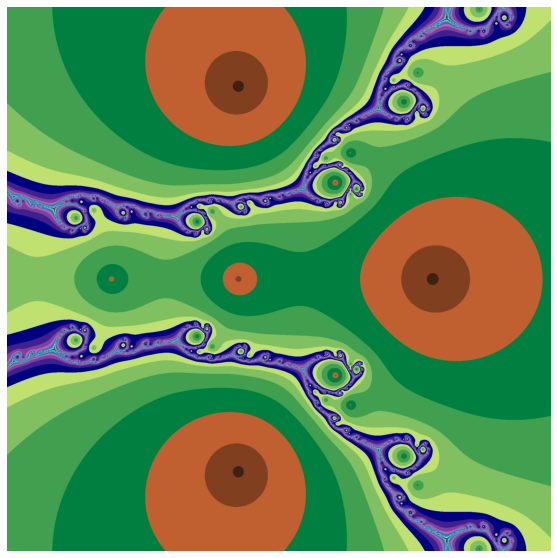

In [7]:
def f(z):
    return 10*z**3 -4*z**2 + 8*z - 10  # Complex function.

c_newton(f,'fl3.jpg',1000)

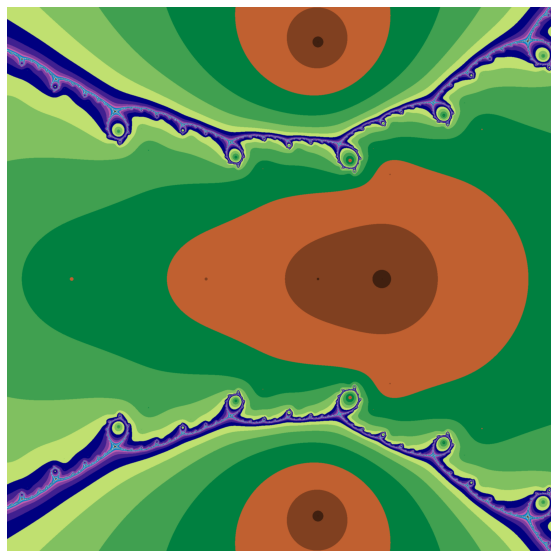

In [8]:
def f(z):
    return z**3 - z**2 + 2*z - 1.0  # Complex function.

c_newton(f,'fl4.jpg',1000)

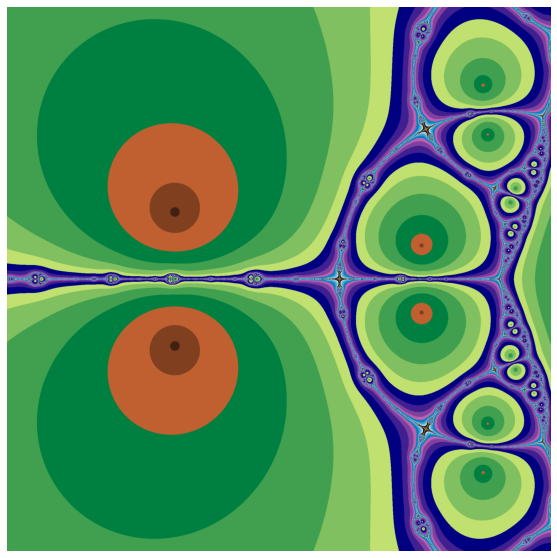

In [9]:
def f(z):
    return z**3 - z**2 - 2*z - 1.0  # Complex function.

c_newton(f,'fl5.jpg',1000)